<a href="https://colab.research.google.com/github/kellianneyang/food-sales-predictions/blob/main/food_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analysis: Food Sales Predictions**

# **Preliminary Steps**

In [51]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from matplotlib.ticker import FuncFormatter

In [53]:
# load the dataset; dataset has header
filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)

In [54]:
# display summary info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [55]:
# display first 20 rows
df.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


## Data Dictionary

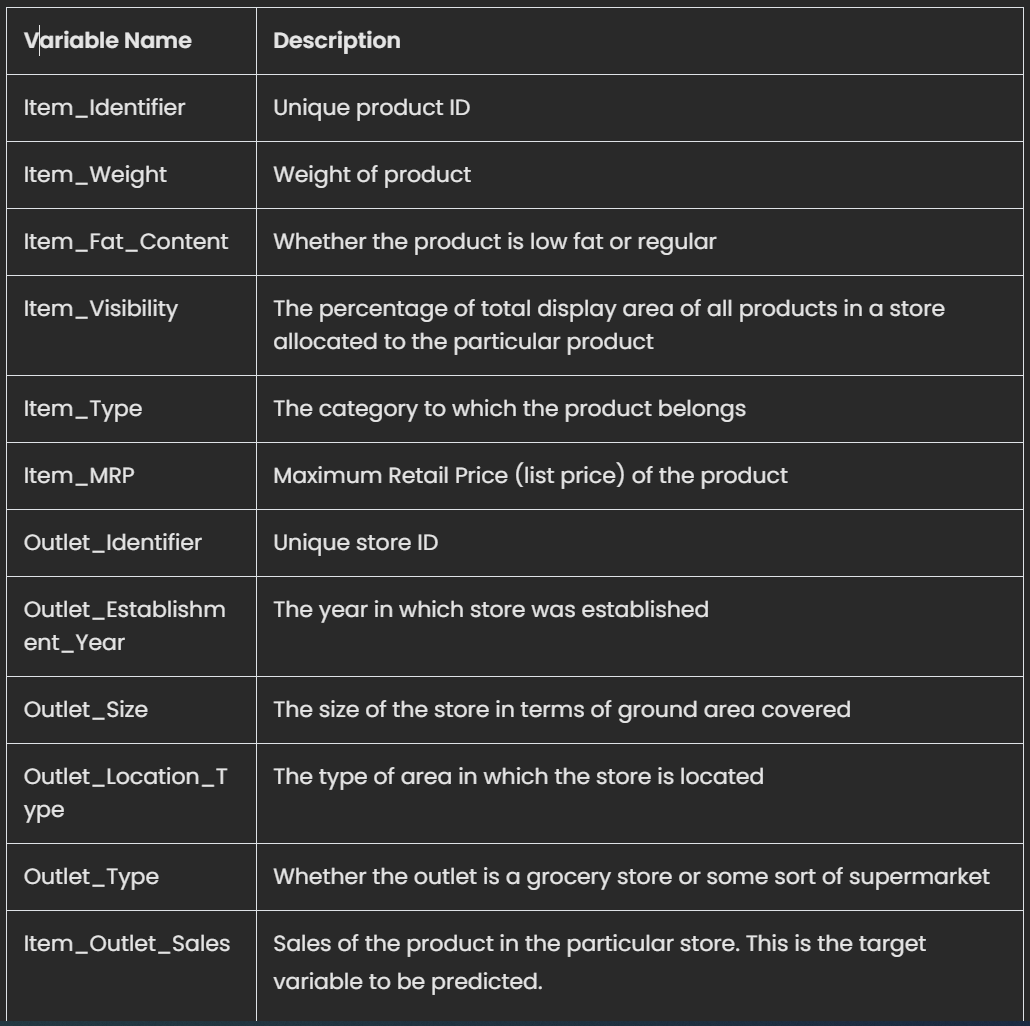

# **Data Cleaning**

## How many rows and columns?


In [56]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in this dataset.")

There are 8523 rows and 12 columns in this dataset.


## What are the dataypes of each variable?

In [57]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## Are there duplicates? If so, drop any duplicates.

In [58]:
print(f"There are {df.duplicated().sum()} duplicates in the dataset.")

There are 0 duplicates in the dataset.


## Identify missing values.

In [59]:
# see how many missing values there are in each column
sum_missing = df.isna().sum()
sum_missing

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [60]:
# calculate percentage of missing values for Item_Weight
count_missing_Item_Weight = sum_missing.loc['Item_Weight']
percent_missing_Item_Weight = (((count_missing_Item_Weight) / (df.shape[0])*100)).round(2)
print(f"There are {count_missing_Item_Weight} missing values in the Item_Weight column, representing {percent_missing_Item_Weight}% of values missing.")

There are 1463 missing values in the Item_Weight column, representing 17.17% of values missing.


In [61]:
# calculate percentage of missing values for Outlet_Size
count_missing_Outlet_Size = sum_missing.loc['Outlet_Size']
percent_missing_Outlet_Size = (((count_missing_Outlet_Size) / (df.shape[0])*100)).round(2)
print(f"There are {count_missing_Outlet_Size} missing values in the Item_Weight column, representing {percent_missing_Outlet_Size}% of values missing.")

There are 2410 missing values in the Item_Weight column, representing 28.28% of values missing.


## Address the missing values.



- I will NOT delete the columns missing values, because the percents of missing values in those columns are not over 50%. 

- I will NOT delete the rows missing values, because at most they would have two out of 12 values missing.

- I WILL impute the missing values. I address imputation for both columns below.

In [62]:
# Item_Weight missing values
# find same item (via Item_Identifier) at other stores to fill in missing Item_Weight

# loop through all the rows in the df
for index in df.index:

  # create a filter for only items whose Item_Identifier matches that of the current row
  item_identifier_filter = df['Item_Identifier'] == df.loc[index, 'Item_Identifier']

  # calculate the mean item weight of the items in the filter
  mean_item_weight = df.loc[item_identifier_filter, 'Item_Weight'].mean()

  # assign the mean_item_weight to the Item_Weight column in this row
  df.loc[index, 'Item_Weight'] = mean_item_weight



In [63]:
# check if Item_Weights have been imputed
print(f"There are {df.isna().sum()['Item_Weight']} missing values in Item_Weight.")

There are 4 missing values in Item_Weight.


In [64]:
# check the 4 items left that are missing their Item_Weight
filtered_df = df[df['Item_Weight'].isna()]
filtered_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [65]:
# confirm that these Item_Identifiers each only appeared in the dataset once
for index, row in filtered_df.iterrows():
  identifier = row['Item_Identifier']
  number = df['Item_Identifier'].value_counts()[identifier]
  print(f"The Item_Idenfier {identifier} appears in the dataset {number} time(s).")

The Item_Idenfier FDN52 appears in the dataset 1 time(s).
The Item_Idenfier FDK57 appears in the dataset 1 time(s).
The Item_Idenfier FDE52 appears in the dataset 1 time(s).
The Item_Idenfier FDQ60 appears in the dataset 1 time(s).


In [66]:
# since they are all unique items, their Item_Weight is unknown
# set their Item_Weights to the median Item_Weight (median is more resistant to outliers)

for index, row in filtered_df.iterrows():
  df.loc[index, 'Item_Weight'] = df['Item_Weight'].median()

In [67]:
# check if all Item_Weights have been imputed
print(f"There are {df.isna().sum()['Item_Weight']} missing values in Item_Weight.")

There are 0 missing values in Item_Weight.


In [68]:
# Outlet_Size missing values

# find same outlet (via Outlet_Identifier) in other rows to fill in missing Outlet_Size

In [69]:
# loop through all the rows in the df
for index in df.index:

  # create a filter for only items whose Item_Identifier matches that of the current row
  outlet_identifier_filter = df['Outlet_Identifier'] == df.loc[index, 'Outlet_Identifier']

  # calculate the mean item weight of the items in the filter
  outlet_size = df.loc[outlet_identifier_filter, 'Outlet_Size'].min()

  # assign the mean_item_weight to the Item_Weight column in this row
  df.loc[index, 'Outlet_Size'] = outlet_size

In [70]:
# check if Outlet_Sizes have been imputed
print(f"There are {df.isna().sum()['Outlet_Size']} missing values in Outlet_Size.")

There are 2410 missing values in Outlet_Size.


In [71]:
# none of the Outlet_Identifiers missing their Outlet_Size had an Outlet_Size in another row

# since they are all unique outlets, their Outlet_Size is unknown
# set their Outlet_Sizes to 'Unknown' (won't fill with mode of Outlet_Size because it will bias data toward that value (Medium))

df['Outlet_Size'].fillna('Unknown', inplace = True)

In [72]:
# check if all Outlet_Sizes have been imputed
print(f"There are {df.isna().sum()['Outlet_Size']} missing values in Outlet_Size.")

There are 0 missing values in Outlet_Size.


## Confirm that there are no missing values after addressing them.

In [73]:
missing = df.isna().sum().sum()
print(f"There are {missing} missing values remaining.")

There are 0 missing values remaining.


## Find and fix any inconsistent categories of data.



In [74]:
# check descriptive statistics of object columns
df.describe(include = 'object').round(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523
unique,1559,5,16,10,4,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [75]:
# create list of object type columns
dtypes = df.dtypes
object_dtypes = dtypes[dtypes == 'object']
object_dtypes

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [76]:
# print the unique values for all the object type columns to look for inconsistent category names
for column in object_dtypes.index:
  print(column)
  print(df[column].unique())
  print('')

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']

Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

Outlet_Size
['Medium' 'Unknown' 'High' 'Small']

Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']

Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']



In [77]:
# check out how many items belong to each category for object type columns
for column in object_dtypes.index:
  print(column)
  print(df[column].value_counts())
  print('')

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
O

In [78]:
# fix Item_Fat_Content values to make consistent

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')

# check results
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [79]:
# fix Outlet_Size values

# I would ask the source of the data if 'High' should be 'Large', but for now
# I will assume it should be, and replace it

df['Outlet_Size'] = df['Outlet_Size'].replace('High', 'Large')

# check results
df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
Large       932
Name: Outlet_Size, dtype: int64

## For any numerical columns, obtain the summary statistics of each (min, max, mean).



In [80]:
# check descriptive statistics of numerical columns
df.describe(include = 'number').round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.88,0.07,140.99,1997.83,2181.29
std,4.65,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,8.78,0.03,93.83,1987.00,834.25
50%,12.65,0.05,143.01,1999.00,1794.33
75%,16.85,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


All data now looks clean and all missing values have been imputed.

---

# **Exploratory Analysis**

## Explore Item_Outlet_Sales with visualizations

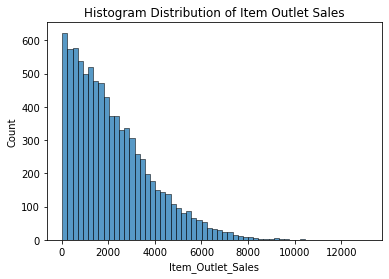

In [81]:
# create univariate histogram for sales with seaborn

# draw histogram
ax = sns.histplot(data = df, x = 'Item_Outlet_Sales')

# set title
ax.set_title('Histogram Distribution of Item Outlet Sales');

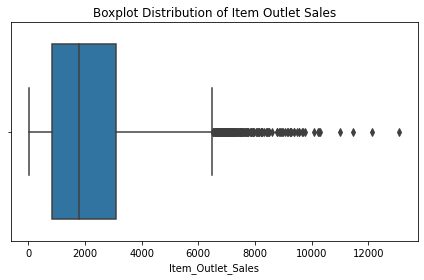

In [82]:
# create univariate boxplot for sales with seaborn

# draw boxplot
ax = sns.boxplot(x = 'Item_Outlet_Sales', data = df)

# set title
ax.set_title('Boxplot Distribution of Item Outlet Sales')

# set tight layout
plt.tight_layout();

In [83]:
# look at descriptive statistics for Item_Outlet_Sales
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

## Explore all pairwise relationships between numerical variables with scatterplots

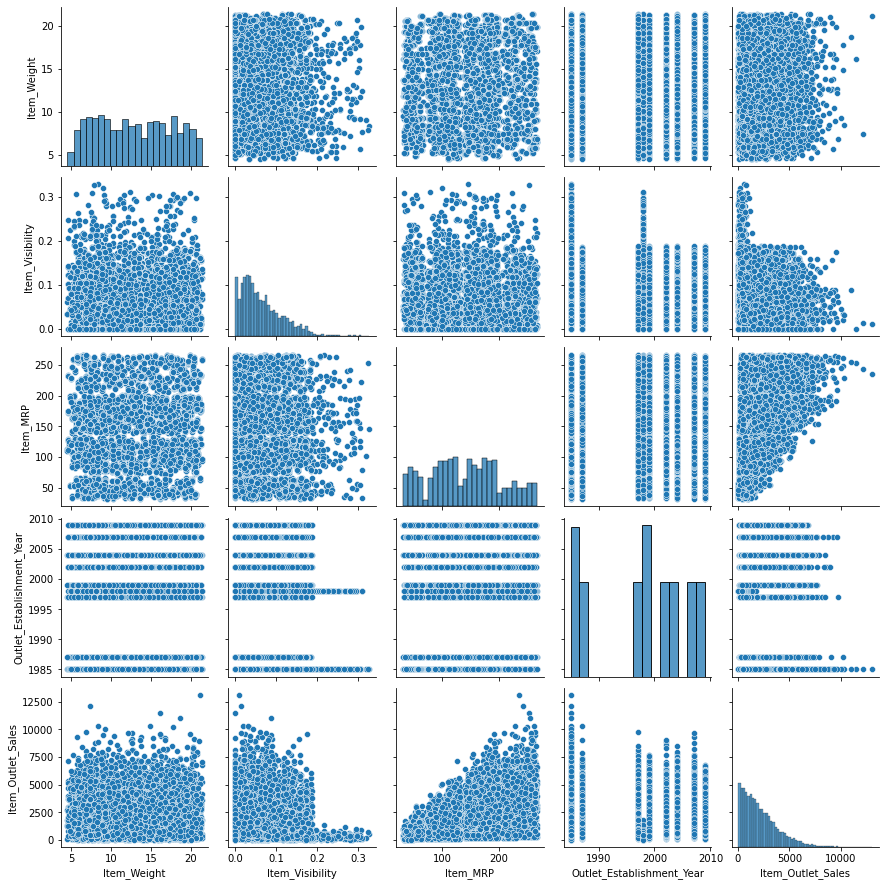

In [84]:
# explore possible scatterplots and histograms of numerical variables with seaborn
sns.pairplot(df);

# if want to select features instead of see all features:
# sns.pairplot(data = df, vars = ['list', 'of', 'col', 'names']);

# alternate code:
# plt.figure()
# scatter_matrix(df, alpha = 0.2, figsize=(12, 12), diagonal = 'hist')
# plt.show();

Interesting observations to follow up on from pairplot:

- some degree of correlation: Item_Outlet_Sales and Item_MRP
- strange cliff: Item_Outlet_Sales and Item_Visibility

## Explore multivariate histograms, boxplots, and barplots (Item_Outlet_Sales grouped by categorical variables)

In [85]:
# make list of all categorical columns
categorical_columns = list(df.select_dtypes(include = 'object'))

# take out Item_Identifier, which has too many unique values for the plots to be informational
categorical_columns.remove('Item_Identifier')

# check list
print(categorical_columns)

['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


### Boxplots

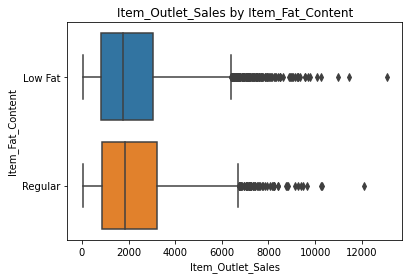

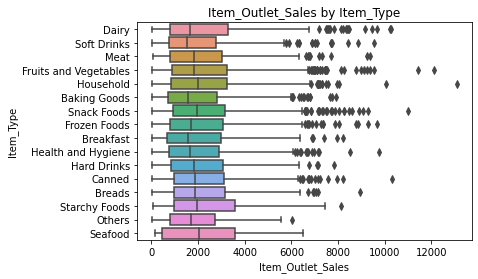

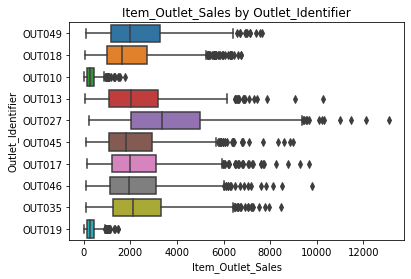

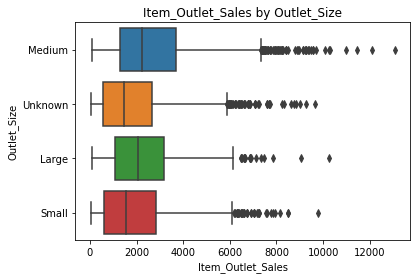

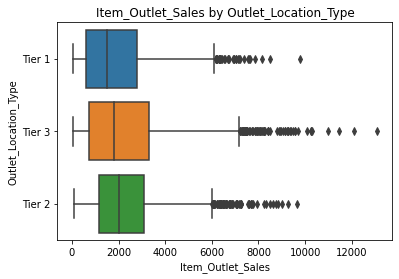

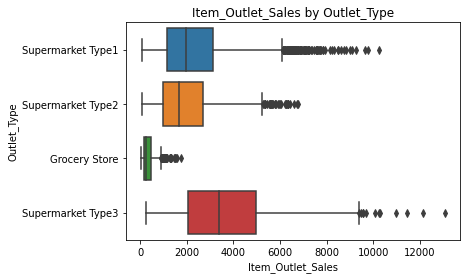

In [86]:
# create and view boxplots

# for each categorical column
for column in categorical_columns:

  # create col_name variable to use in loop
  column_name = column

  # draw boxplot with seaborn
  column = sns.boxplot(x = 'Item_Outlet_Sales', y = column, data = df)

  # set title for boxplot
  column.set_title('Item_Outlet_Sales by ' + column_name)

  # show plot
  plt.show()

  # print blank lines for readability
  print('\n\n')
  

### Histograms

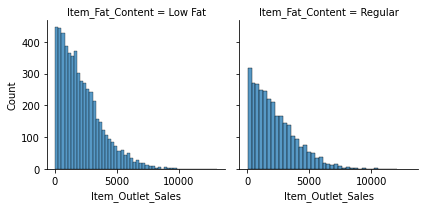

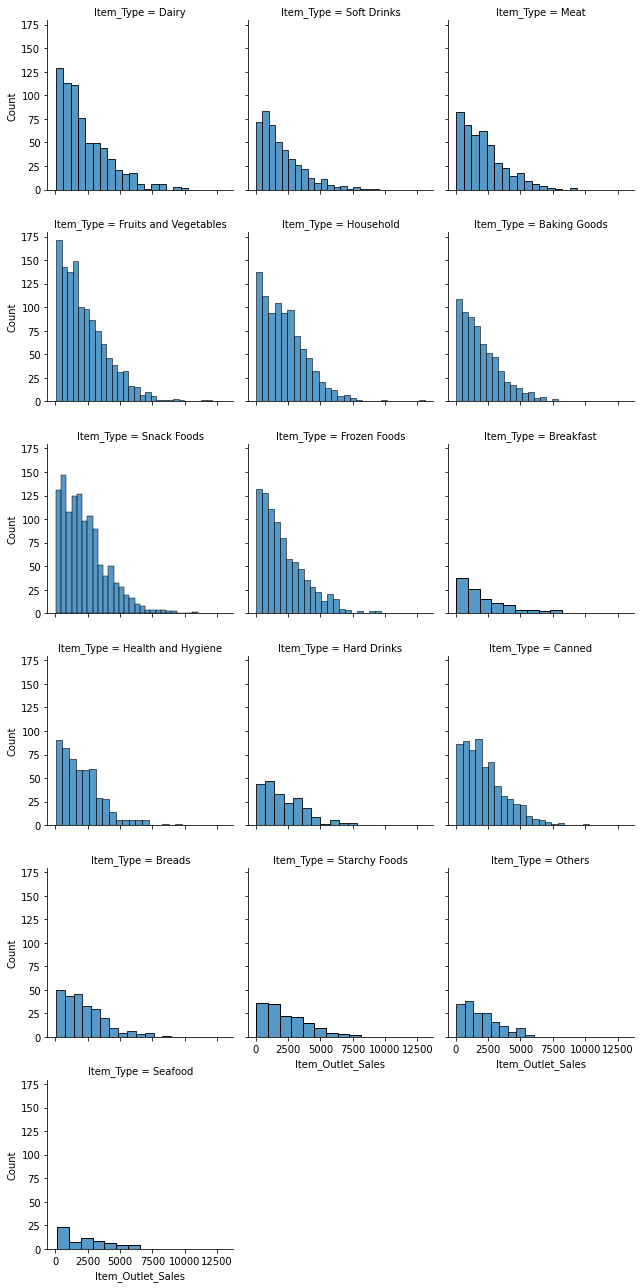

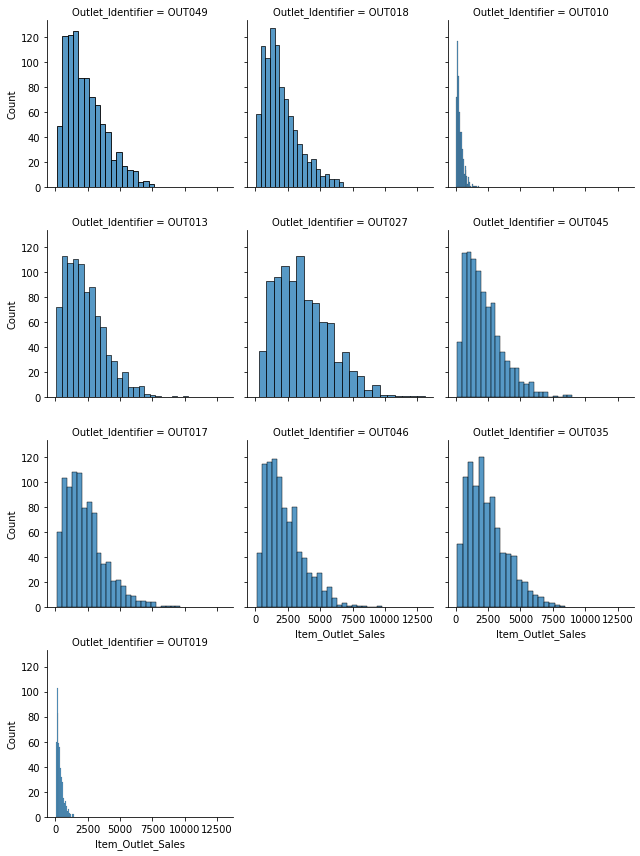

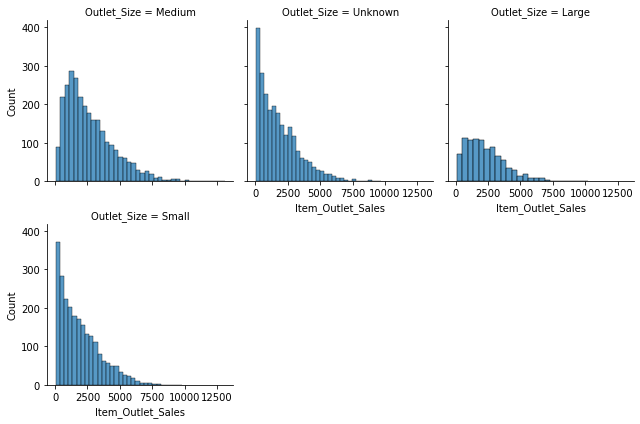

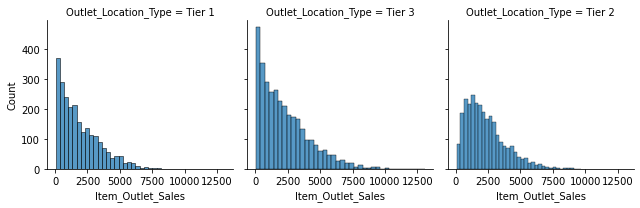

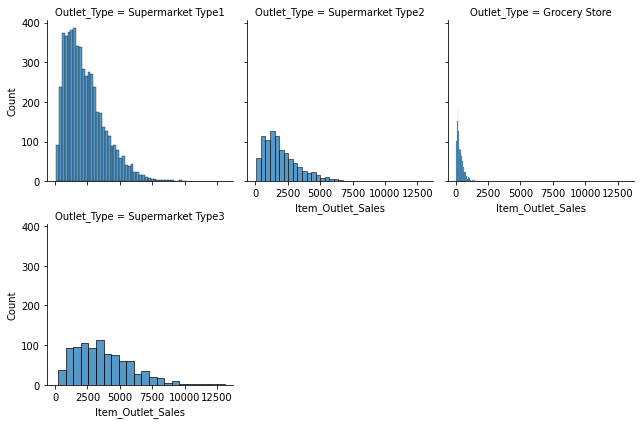

In [87]:
# for each categorical column
for column in categorical_columns:

  # if the number of unique values in the column is more than 3
  if len(df[column].value_counts().index) > 3:

    # initiate sns.FacetGrid with column wrapping
    plot = sns.FacetGrid(df, col = column, col_wrap = 3)

    # draw histograms in the facetgrid
    plot.map(sns.histplot, 'Item_Outlet_Sales')

  # else (number of unique values in the column is 3 or less)
  else:

    # initiate sns.FacetGrid without column wrapping
    plot = sns.FacetGrid(df, col = column)

    # draw histograms in the facetgrid
    plot.map(sns.histplot, 'Item_Outlet_Sales')
  
  # show plot
  plt.show()

  # print blank lines for readability
  print('\n\n')
  

### Barplots

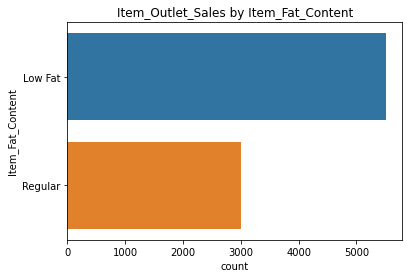

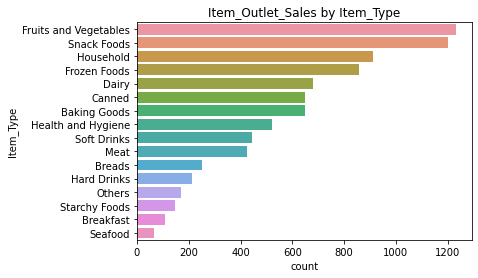

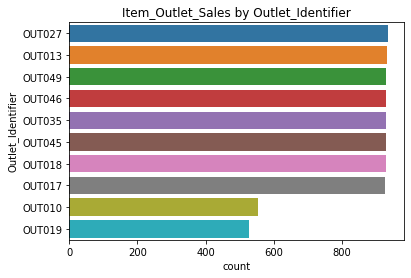

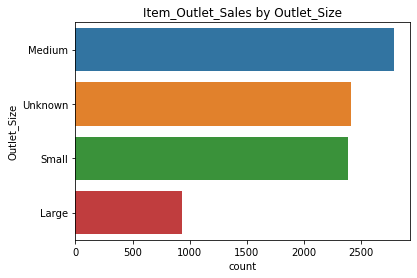

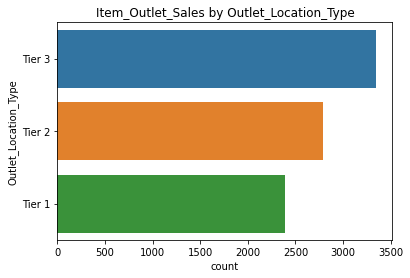

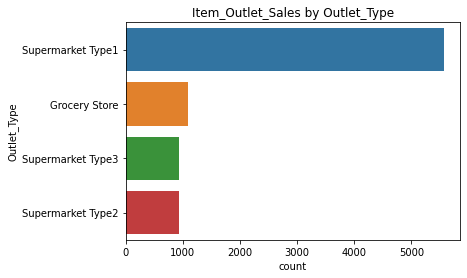

In [88]:
# explore barplots for all categorical columns on Item_Outlet_Sales

# for each categorical column
for column in categorical_columns:

  # set variable for column name
  column_name = column

  # set the label order for bars
  label_order = df[column].value_counts().index
  
  # draw barplots with seaborn
  plot = sns.countplot(data = df, 
                      y = column, 
                      order = label_order)
  
  # set title
  plot.set_title('Item_Outlet_Sales by ' + column_name)
  
  # show plot
  plt.show()

  # print blank lines for readability
  print('\n\n')
  

In [89]:
# More potential data exploration if needed: Item_Outlet_Sales grouped by (Outlet_Type OR Outlet_Location_Type) AND Item_MRP

### Heatmap

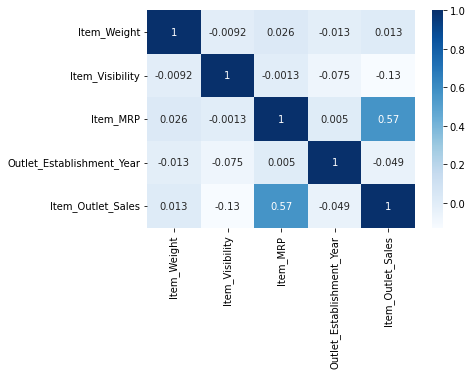

In [90]:
# explore heatmap of correlation between features

# create correlations between numerical columns
corr = df.corr()

# draw heatmap
sns.heatmap(corr, cmap = 'Blues', annot = True);

In [91]:
# moderate degree of (positive) correlation: Item_MRP and Item_Outlet_Sales

# **Explanatory Analysis**

## Questions to answer:

1. Do high-priced items comprise a larger proportion of sales than low-priced items?
2. What is the relationship between item type and sales?

Further questions:
3. What is the relationship between item visibility and sales?
4. What is the relationship between outlet type/outlet location type/outlet size/year established and sales?

## 1. Do high-priced items comprise a larger proportion of sales than low-priced items?

We can see from the scatterplot below that price and sales are positively correlated, that is, as an item's price rises, so does the absolute dollar amount of its sales. This makes intuitive sense, since more money gets spent on items sold for more money.

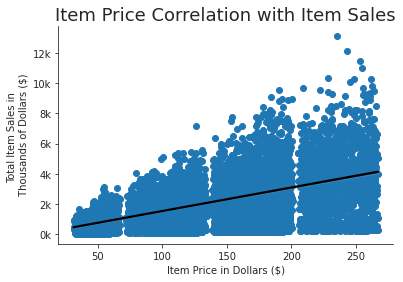

In [92]:
# set format function for y-axis label to show 'k' instead of '000'
def thousands_format(x, pos):
  return '{:.0f}k'.format(x/1000)

# set white background
sns.set_style('ticks')

# create seaborn regplot with best fit line
ax = sns.regplot(data = df,
            x = 'Item_MRP',
            y = 'Item_Outlet_Sales',
            line_kws = {'color': 'black'},
            scatter_kws = {'alpha': 1});

# set title
ax.set_title('Item Price Correlation with Item Sales', fontsize = 18)

# rewrite x-axis label
ax.set_xlabel('Item Price in Dollars ($)')

# rewrite y-axis label
ax.set_ylabel('Total Item Sales in \n Thousands of Dollars ($)')

# set variable for format function above
formatter = FuncFormatter(thousands_format)

# apply formatter to y-axis
plt.gca().yaxis.set_major_formatter(formatter)

# take away top and right outline of plot
sns.despine()

However, do higher-priced items make up more sales just because they are priced higher? Or do higher-priced items actually sell less than lower-priced items?

A good guess is that higher-priced items do sell less than lower-priced items, because people have limited money and so are likely to buy lower-priced items more frequently. 

However, this is not the case with our data. In the pie chart below, we can see that high-priced items make up 39% of the overall sales. This means that high-priced items are actually selling more than low-priced items, not just making more sales in dollar amount because they are priced higher.

In [93]:
# separate prices into low, moderate-low, moderate-high, and high categories based on quartiles
Item_MRP_description = df['Item_MRP'].describe()
Item_MRP_description

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [107]:
# set variables for the quartile values, rounded to the nearest cent
q1_boundary = round(Item_MRP_description['25%'], 2)
q2_boundary = round(Item_MRP_description['50%'], 2)
q3_boundary = round(Item_MRP_description['75%'], 2)

# make a new column in df sorting Item_MRPs into categories

# for each row in df
for row, column in df.iterrows():

  # if Item_MRP of row is less than Q1
  if df.at[row, 'Item_MRP'] < q1_boundary:

    # assign value of new column Item_Price_Low_High to 'low'
    df.at[row, 'Item_Price_Low_High'] = 'low'

  # else if Item_MRP of row is more than or equal to Q1 and less than Q2 (median)
  elif (df.at[row, 'Item_MRP'] >= q1_boundary) & (df.at[row, 'Item_MRP'] < q2_boundary):

    # assign value of new column Item_Price_Low_High to 'moderate-low'
    df.at[row, 'Item_Price_Low_High'] = 'moderate-low'

  # else if Item_MRP of row is more than or equal to Q2 and less than Q3
  elif (df.at[row, 'Item_MRP'] >= q2_boundary) & (df.at[row, 'Item_MRP'] < q3_boundary):

    # assign value of new column Item_Price_Low_High to 'moderate-high'
    df.at[row, 'Item_Price_Low_High'] = 'moderate-high'
  
  # else (if Item_MRP of row is more than or equal to Q3)
  else:

    # assign value of new column Item_Price_Low_High to 'high'
    df.at[row, 'Item_Price_Low_High'] = 'high'

# look at the value_counts of new column 'Item_Price_Low_High' to confirm rows were split evenly into quartiles
df['Item_Price_Low_High'].value_counts()

high             2131
low              2131
moderate-high    2131
moderate-low     2130
Name: Item_Price_Low_High, dtype: int64

In [108]:
# created filtered dfs for each category of Item_Price_Low_High

high_price_items_df = df[df['Item_Price_Low_High'] == 'high']

mod_high_price_items_df = df[df['Item_Price_Low_High'] == 'moderate-high']

mod_low_price_items_df = df[df['Item_Price_Low_High'] == 'moderate-low']

low_price_items_df = df[df['Item_Price_Low_High'] == 'low']

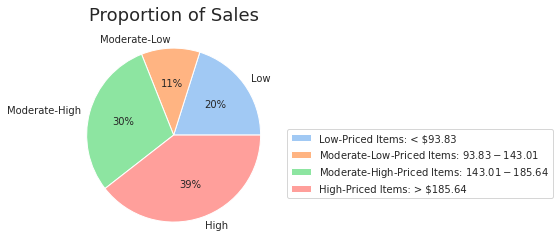

In [132]:
# create pie chart showing the proportion of sales

# create list of data points to use in pie chart (sum of 'Item_Outlet_Sales' for each filtered df)
data = [low_price_items_df['Item_Outlet_Sales'].sum(), 
        mod_low_price_items_df['Item_Outlet_Sales'].sum(),
        mod_high_price_items_df['Item_Outlet_Sales'].sum(),
        high_price_items_df['Item_Outlet_Sales'].sum()
        ]

# create labels to use in pie chart
labels = ['Low', 'Moderate-Low', 'Moderate-High', 'High']

# set color palette
colors = sns.color_palette('pastel')[0:5]

# draw pie chart with matplotlib
plt.pie(data, 
        labels = labels, 
        colors = colors, 
        autopct='%.0f%%')

# set title
plt.title('Proportion of Sales', fontsize = 18)

# annotate to show quartile boundary prices
plt.legend([f"Low-Priced Items: < ${q1_boundary}", 
            f"Moderate-Low-Priced Items: ${q1_boundary} - ${q2_boundary}", 
            f"Moderate-High-Priced Items: ${q2_boundary} - ${q3_boundary}", 
            f"High-Priced Items: > ${q3_boundary}"],
           loc = "best",
           bbox_to_anchor = (1, 0.05, 0.5, 0.5)
           )

# show plot
plt.show;

## 2. What is the relationship between item type and sales?

In [151]:
df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending = False).index

Index(['Starchy Foods', 'Seafood', 'Fruits and Vegetables', 'Snack Foods',
       'Household', 'Dairy', 'Canned', 'Breads', 'Meat', 'Hard Drinks',
       'Frozen Foods', 'Breakfast', 'Health and Hygiene', 'Soft Drinks',
       'Baking Goods', 'Others'],
      dtype='object', name='Item_Type')

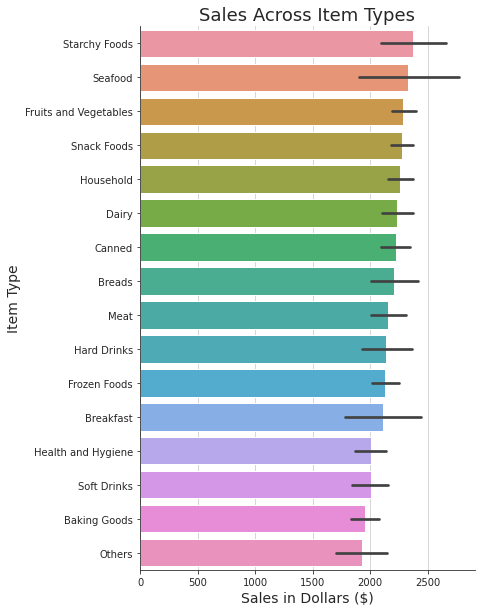

In [156]:
label_order = df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending = False).index

plt.figure(figsize = (6, 10))

plt.grid()

ax = sns.barplot(data = df, y = 'Item_Type', x = 'Item_Outlet_Sales', order = label_order)

ax.set_title('Sales Across Item Types', fontsize = 18)

ax.set_xlabel('Sales in Dollars ($)', fontsize = 14)

ax.set_ylabel('Item Type', fontsize = 14)

sns.despine();